In [40]:
import wandb
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

In [41]:
api = wandb.Api()

In [42]:
entity = 'ucalgary'

In [43]:
project = 'adnan-sparse-rebasin_compare'

In [44]:
runs = api.runs(f"{entity}/{project}")

In [45]:
run_id = []
for  run in runs:
    run_id.append(run.id)

In [46]:
len(run_id)

216

In [47]:
width = []
sparsity = []
lth = []
naive = []
permuted = []
rewind = []
seed = []


In [48]:

# for i in range(len(run_id)):

#     run = api.run(f"{entity}/{project}/{run_id[i]}")

#     width.append(run.config['width'])
#     sparsity.append(run.config['sparsity'])
#     lth.append(run.summary['LTH  Test Accuracy'])
#     naive.append(run.summary['Model B Naive Naive Test Accuracy'])
#     permuted.append(run.summary['Model B Permuted  Test Accuracy'])
#     rewind.append(run.config['rewind_point']) 


In [49]:
exp_data = []
for i in range(len(run_id)):

    run = api.run(f"{entity}/{project}/{run_id[i]}")

    run_data = {
    'width': (run.config['width']),
    'sparsity':(run.config['sparsity']),
    'rewind':(run.config['rewind_point']),
    'lth': (run.summary['LTH  Test Accuracy']),
    'naive': (run.summary['Model B Naive Naive Test Accuracy']),
    'permuted': (run.summary['Model B Permuted  Test Accuracy']),
    }

    exp_data.append(run_data)

In [50]:
data = pd.DataFrame(exp_data)

In [51]:
data

,width,sparsity,rewind,lth,naive,permuted
0,1,0.80,0,90.46,90.07,89.76
1,4,0.80,0,94.51,94.39,94.40
2,4,0.80,0,94.72,94.32,94.58
3,1,0.97,0,86.28,86.03,85.84
4,1,0.80,0,90.25,89.51,89.77
...,...,...,...,...,...,...
211,4,0.97,75,94.94,91.85,94.44
212,4,0.97,75,95.04,92.01,94.05
213,4,0.97,100,94.94,91.87,94.14
214,4,0.97,100,95.11,91.97,94.10


In [52]:
# data.loc[(data['sparsity']==0.8) & (data['width']==1) & (data['rewind']==0), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]

In [53]:
# spar = 0.9
# w = 1
# rew = 20

# new_data = data.loc[(data['sparsity']==spar) & (data['width']==w) & (data['rewind']==100), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]

In [54]:
## plot for width = 1

In [55]:
rewind_points = [0,5,10,15,20,25,50,75,100]

In [17]:
# plt.rcParams.update({
#     'font.size': 65,             # Global font size
#     'axes.titlesize': 50,        # Font size for titles
#     'axes.labelsize': 50,        # Font size for x and y labels
#     'xtick.labelsize': 50,       # Font size for x-axis tick labels
#     'ytick.labelsize': 50,       # Font size for y-axis tick labels
#     'legend.fontsize': 40,       # Font size for the legend
#     'axes.titleweight': 'bold',  # Make the title bold
#     # 'text.usetex': True,         # Use LaTeX for rendering text
# })

In [18]:

# # Figure properties
# figure.figsize: 10, 6 # figure size in inches

# # Font properties
# font.size: 20 # Size of the font
# font.family: sans-serif # Type of Font
# font.sans-serif : "DejaVu Sans"


# # Axes properties
# axes.linewidth: 2  # edge linewidth
# axes.labelpad: 6   # space between label and axis
# axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
# axes.titlepad: 20.0    # pad between axes and title in points
# axes.labelsize: 18     # Axes labels size
# axes.titlesize: 30     # Plot title size
# axes.labelweight: 500  # Axel Labels weight
# axes.titleweight: 500  # Axel Titleweight
# axes.edgecolor: 262626
# axes.labelcolor: 262626
# axes.titlecolor: 262626

# # Tick properties
# # x-axis
# xtick.direction: inout # direction: in, out, or inout
# xtick.major.size: 0 # major tick size in points
# xtick.major.width: 0 # major tick width in points
# xtick.minor.size: 0 # minor tick size in points
# xtick.minor.width: 0 # minor tick width in points
# xtick.major.pad : 5
# xtick.minor.pad: 5
# xtick.labelsize : 14

# # y-axis
# ytick.direction: inout # direction: in, out, or inout
# ytick.major.size: 0 # major tick size in points
# ytick.major.width: 0 # major tick width in points
# ytick.minor.size: 0 # minor tick size in points
# ytick.minor.width: 0 # minor tick width in points
# ytick.major.pad : 5
# ytick.minor.pad: 5
# ytick.labelsize : 14

# # Line properties
# lines.linewidth: 3.0

# # Legend properties
# legend.framealpha: 1.0  # opacity of legend frame
# legend.frameon: False   # whether or not to draw a frame around legend
# legend.fontsize: 14     # Font size of the legend
# legend.borderpad : 0
# #legend.borderaxespad: 1.5

# #Edge Color properties
# #patch.force_edgecolor: True #Edge color for the bars

In [19]:
!pwd

/fs01/home/adnan/sparse-rebasin/plots


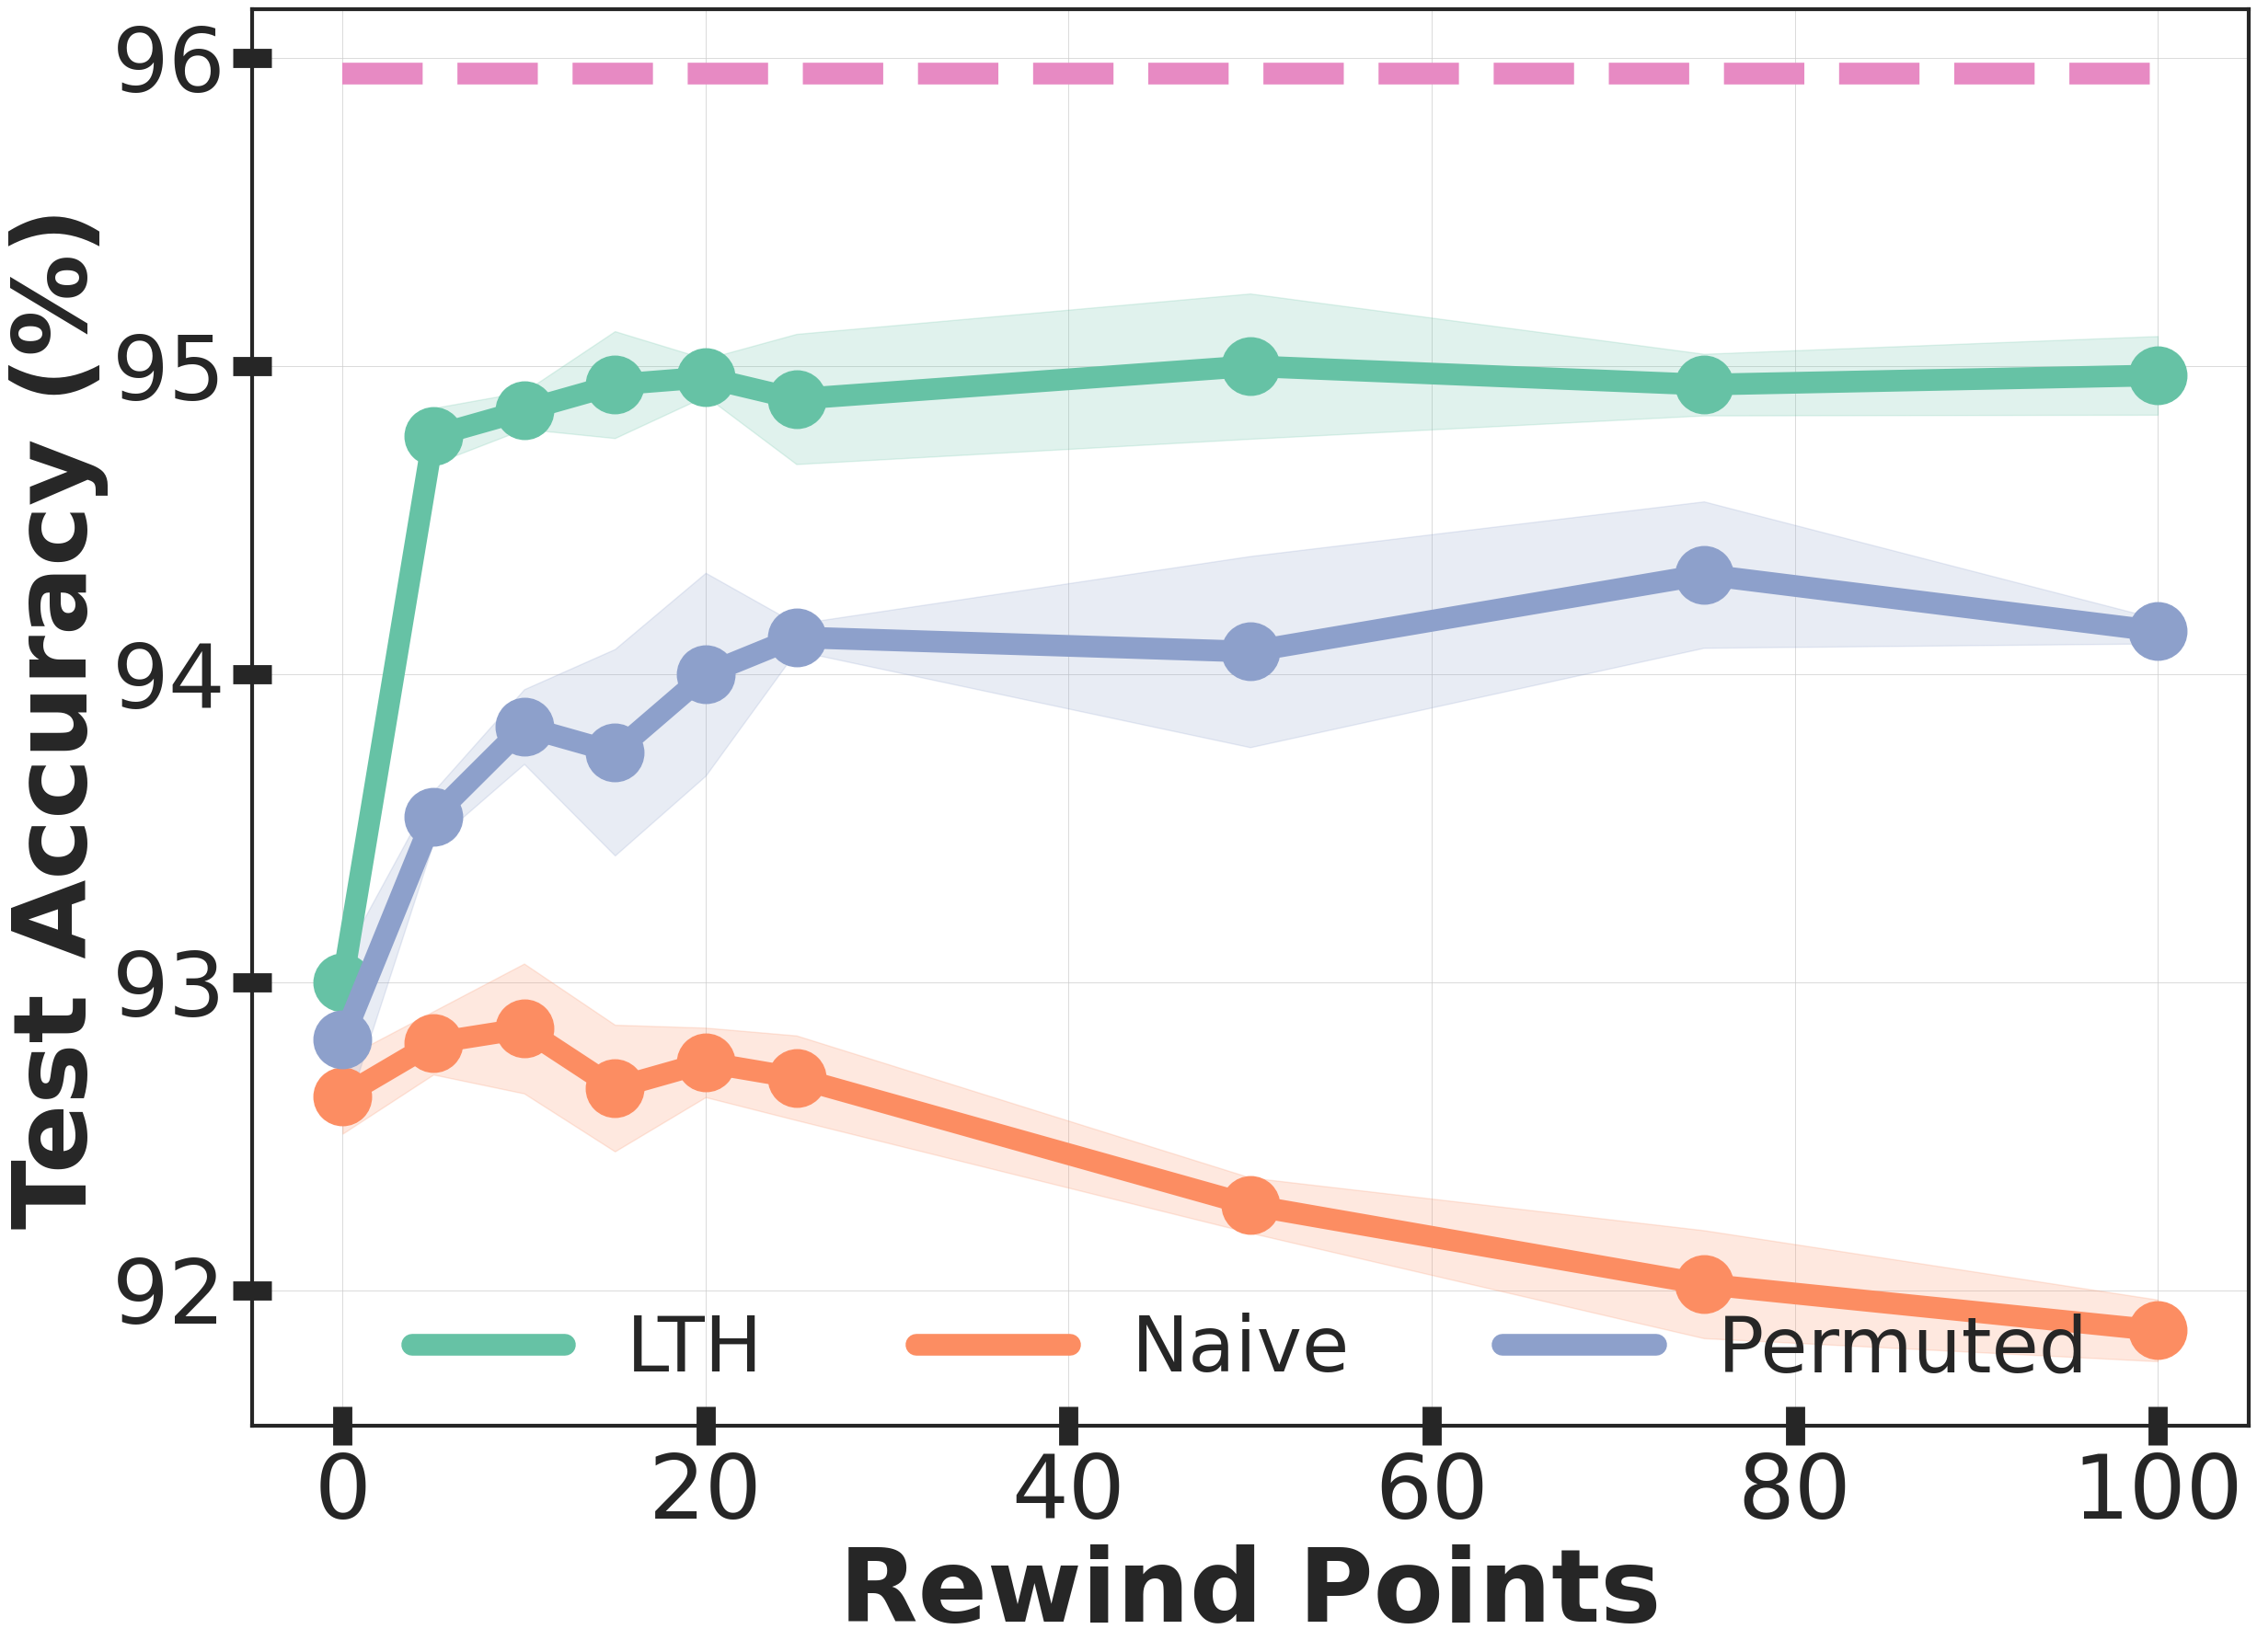

In [159]:


widths = [1,4]
sparsities = [0.80,0.90, 0.95, 0.97]

dense_1 = np.ones((9))*92.88
dense_4 = np.ones((9))*95.95

for w in widths:
    for spar in sparsities:

# spar = 0.95
# w = 4
        lth = []
        naive = []
        permuted = []

        lth_ = []
        naive_ = []
        permuted_ = []
        
        for rew in rewind_points:
            new_data = data.loc[(data['sparsity']==spar) & (data['width']==w) & (data['rewind']==rew), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]
        
            lth.append(new_data['lth'].mean())
            naive.append(new_data['naive'].mean())
            permuted.append(new_data['permuted'].mean())

            lth_.append(new_data['lth'].std())
            naive_.append(new_data['naive'].std())
            permuted_.append(new_data['permuted'].std())

        lth = np.array(lth)
        lth_ = np.array(lth_)

        naive = np.array(naive)
        naive_ = np.array(naive_)

        permuted = np.array(permuted)
        permuted_ = np.array(permuted_)
        
        colors = sns.color_palette("Set2") 
        sns.set(style='ticks', palette='Set2')

        plt.close()
        plt.style.use('./plot_style.mplstyle') 

        if w==1:
            plt.plot(rewind_points, dense_1, '--', color=colors[3])
        if w==4:
            plt.plot(rewind_points, dense_4, '--', color=colors[3])
        
        plt.plot(rewind_points, lth, 'o', markersize=45, color=colors[0])
        plt.plot(rewind_points, lth, color=colors[0], label='LTH')
        plt.fill_between(rewind_points, lth-lth_, lth+lth_, color=colors[0],alpha=0.2 )

        plt.plot(rewind_points, naive, 'o', markersize=45, color=colors[1])
        plt.plot(rewind_points, naive, color=colors[1], label='Naive')
        plt.fill_between(rewind_points, naive-naive_, naive+naive_, color=colors[1],alpha=0.2 )

        plt.plot(rewind_points, permuted, 'o', markersize=45, color=colors[2])
        plt.plot(rewind_points, permuted, color=colors[2], label='Permuted')
        plt.fill_between(rewind_points, permuted-permuted_, permuted+permuted_, color=colors[2],alpha=0.2 )

        plt.xlabel('Rewind Points')
        plt.ylabel('Test Accuracy (%)', labelpad=3)
        plt.legend(loc='lower center', ncols=3)
        matplotlib.pyplot.grid(visible=None, which='major', axis='both', linewidth=0.5)
        # plt.grid(color='black', linestyle='--', linewidth=0.3)
        
        # plt.title(f"Test Accuracy for sparsity={spar} and width={w}")
        plt.savefig(f"acc_rewind/{int(spar*100)}_w_{w}.pdf",dpi=400, bbox_inches='tight')


In [143]:
rewind_points

[0, 5, 10, 15, 20, 25, 50, 75, 100]

In [251]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [27]:
plt.style.reload_library()

In [70]:
#### plots for acc vs sparsities

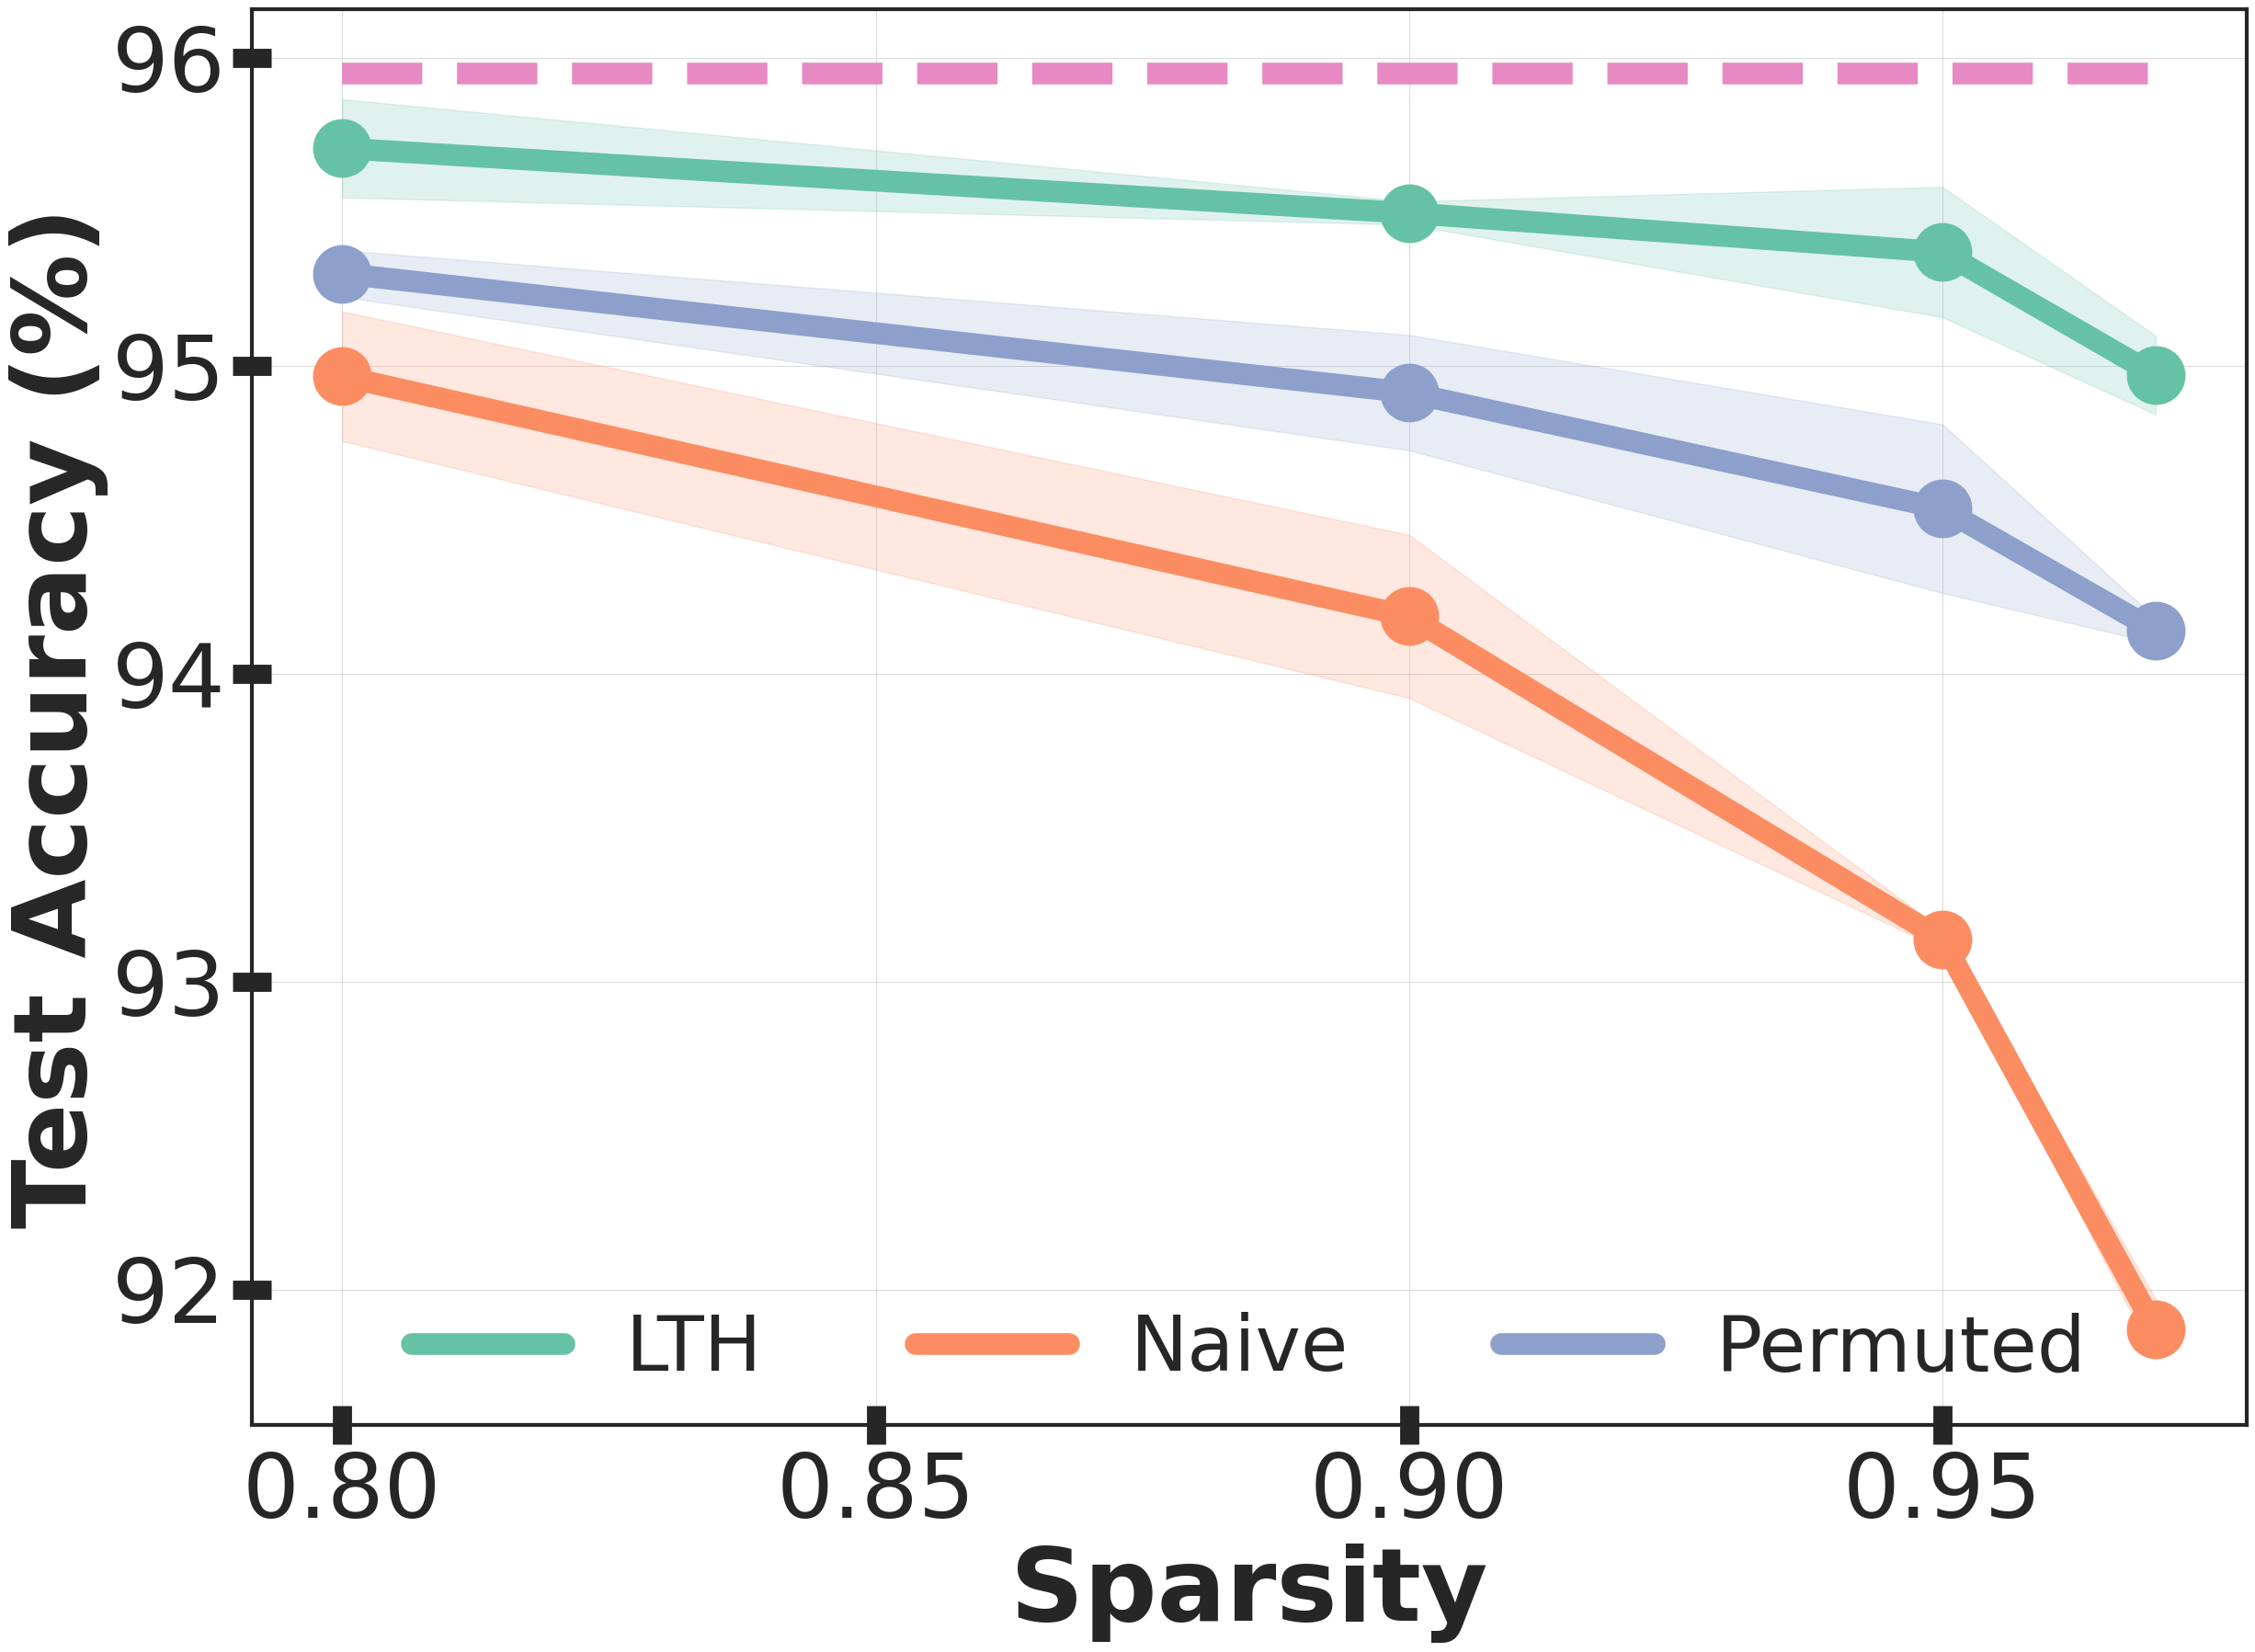

In [160]:


widths = [1,4]
rewind_points = [0,5,10,15,20,25,50,75,100]
sparsities = [0.80,0.90, 0.95, 0.97]

dense_1 = np.ones((4))*92.88
dense_4 = np.ones((4))*95.95

for w in widths:
    for rew in rewind_points:

# spar = 0.95
# w = 4
        lth = []
        naive = []
        permuted = []

        lth_ = []
        naive_ = []
        permuted_ = []
        for spar in sparsities:
            new_data = data.loc[(data['sparsity']==spar) & (data['width']==w) & (data['rewind']==rew), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]
        
            lth.append(new_data['lth'].mean())
            naive.append(new_data['naive'].mean())
            permuted.append(new_data['permuted'].mean())

            lth_.append(new_data['lth'].std())
            naive_.append(new_data['naive'].std())
            permuted_.append(new_data['permuted'].std())


        
        lth = np.array(lth)
        lth_ = np.array(lth_)

        naive = np.array(naive)
        naive_ = np.array(naive_)

        permuted = np.array(permuted)
        permuted_ = np.array(permuted_)
        
        
        
        # plt.close()
        # # plt.figure(figsize=(20,20))
        # plt.plot(sparsities, lth, '-*', label='LTH', color='blue')
        # plt.plot(sparsities, naive, '-+', label='Naive', color='red')
        # plt.plot(sparsities, permuted, '.-', label='Permuted', color='magenta')
        # plt.xlabel('Sparsity')
        # plt.ylabel('Test Accuracy', labelpad=15)
        # plt.legend(loc='lower left', ncols=3)
        # # plt.grid(color='black', linestyle='--', linewidth=0.3)
        
        # plt.title(f"Rewind Point={rew}")



        colors = sns.color_palette("Set2") 
        sns.set(style='ticks', palette='Set2')

        plt.close()
        plt.style.use('./plot_style.mplstyle') 

        if w==1:
            plt.plot(sparsities, dense_1, '--', color=colors[3])
        if w==4:
            plt.plot(sparsities, dense_4, '--', color=colors[3])

        plt.plot(sparsities, lth, 'o', markersize=45, color=colors[0])
        plt.plot(sparsities, lth, color=colors[0], label='LTH')
        plt.fill_between(sparsities, lth-lth_, lth+lth_, color=colors[0],alpha=0.2 )

        plt.plot(sparsities, naive, 'o', markersize=45, color=colors[1])
        plt.plot(sparsities, naive, color=colors[1], label='Naive')
        plt.fill_between(sparsities, naive-naive_, naive+naive_, color=colors[1],alpha=0.2 )

        plt.plot(sparsities, permuted, 'o', markersize=45, color=colors[2])
        plt.plot(sparsities, permuted, color=colors[2], label='Permuted')
        plt.fill_between(sparsities, permuted-permuted_, permuted+permuted_, color=colors[2],alpha=0.2 )

        plt.xlabel('Sparsity')
        plt.ylabel('Test Accuracy (%)', labelpad=3)
        plt.legend(loc='lower center', ncols=3)

        matplotlib.pyplot.grid(visible=None, which='major', axis='both', linewidth=0.5)

        plt.savefig(f"acc_spa/rew_{(rew)}_w_{w}.pdf",dpi=400,  bbox_inches='tight')


In [133]:
### get numbers for latex table


widths = [1,4]
rewind_points = [0,5,10,15,20,25,50,75,100]
sparsities = [0.80,0.90, 0.95, 0.97]


w=4
spar = 0.97

lth = []
naive = []
permuted = []
for rew in rewind_points:
    new_data = data.loc[(data['sparsity']==spar) & (data['width']==w) & (data['rewind']==rew), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]

    lth.append(new_data['lth'].mean())
    naive.append(new_data['naive'].mean())
    permuted.append(new_data['permuted'].mean())


lth_ = []
naive_ = []
permuted_ = []
for rew in rewind_points:
    new_data = data.loc[(data['sparsity']==spar) & (data['width']==w) & (data['rewind']==rew), ['sparsity', 'width', 'rewind', 'lth', 'naive', 'permuted']]

    lth_.append(new_data['lth'].std())
    naive_.append(new_data['naive'].std())
    permuted_.append(new_data['permuted'].std())

In [134]:
# convert to latex table format
arr = permuted
arr_ = permuted_

print('&{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} &{:0.2f} $\pm$ {:0.2f} '.format(
    arr[0], arr_[0], arr[1], arr_[1], arr[2], arr_[2], arr[3], arr_[3],
arr[4], arr_[4], arr[5], arr_[5], arr[6], arr_[6],arr[7], arr_[7],arr[8], arr_[8],))

&92.81 $\pm$ 0.27 &93.54 $\pm$ 0.08 &93.83 $\pm$ 0.12 &93.75 $\pm$ 0.34 &94.00 $\pm$ 0.33 &94.12 $\pm$ 0.04 &94.07 $\pm$ 0.31 &94.32 $\pm$ 0.24 &94.14 $\pm$ 0.04 


In [105]:
# convert to latex table format


arr = permuted
print('&{:0.2f}  &{:0.2f}  &{:0.2f}  &{:0.2f}  &{:0.2f} &{:0.2f}  &{:0.2f} &{:0.2f} &{:0.2f}'.format(
    arr[0],  arr[1],  arr[2],  arr[3],
arr[4],  arr[5],  arr[6], arr[7], arr[8]))

&85.61  &85.93  &86.26  &86.48  &86.12 &86.16  &86.43 &86.06 &85.95


In [137]:
dense_1 = np.ones((4))*992


In [138]:
dense_1

array([992., 992., 992., 992.])